Intalling Required Libraries

In [ ]:
%pip install pandas
%pip install numpy
%pip install pyodbc
%pip install pymssql
%pip install tqdm
%pip install matplotlib
%pip install seaborn
%pip install openpyxl



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import pyodbc
import pymssql
import warnings
warnings.filterwarnings('ignore')


Connection to DataBase

In [5]:
conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=DESKTOP-RCIP6D6;"
    "DATABASE=Financial_Trans;"
    "Trusted_Connection=yes;"
    "MARS_Connection=yes;"
)
print(pyodbc.drivers())

['SQL Server', 'ODBC Driver 17 for SQL Server']


In [6]:
query = "SELECT * FROM users_data"
df = pd.read_sql(query, conn)

df

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,0,33,69,1986,3,Male,858 Plum Avenue,43.590000,-70.330002,29237.0,59613.0,36199.0,763,4
1,1,43,74,1976,4,Female,113 Burns Lane,30.440001,-87.180000,22247.0,45360.0,14587.0,704,3
2,2,48,64,1971,8,Male,6035 Forest Avenue,40.840000,-73.870003,13461.0,27447.0,80850.0,673,5
3,3,49,65,1970,12,Male,840 Elm Avenue,33.889999,-98.510002,13705.0,27943.0,18693.0,681,4
4,4,54,72,1965,3,Female,6016 Little Creek Boulevard,47.610001,-122.300003,37485.0,76431.0,115362.0,716,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,64,62,1955,7,Female,28 First Lane,39.919998,-77.709999,20943.0,39206.0,9219.0,605,4
1996,1996,46,66,1973,6,Female,7853 Grant Street,29.430000,-95.239998,21956.0,44768.0,59862.0,728,3
1997,1997,76,69,1943,8,Male,765 Forest Street,44.919998,-93.400002,39155.0,38800.0,25867.0,758,7
1998,1998,65,67,1954,9,Male,10 Third Avenue,37.560001,-122.370003,0.0,645.0,790.0,688,3


In [8]:
sample_query = """
SELECT TOP (450000)
       t.id                AS transaction_id,
       t.date,
       t.amount,
       t.use_chip,
       t.merchant_id,
       t.merchant_city,
       t.merchant_state,
       t.mcc,

       c.card_brand,
       c.card_type,
       c.credit_limit,
       c.has_chip,

       u.current_age,
       u.retirement_age,
       u.gender,
       u.per_capita_income,
       u.yearly_income,
       u.total_debt,
       u.credit_score,
       u.num_credit_cards
FROM Financial_Transactions t
JOIN cards_data c 
    ON t.card_id = c.id
JOIN users_data u 
    ON t.client_id = u.id
ORDER BY NEWID();
"""

sample_df = pd.read_sql(sample_query, conn)
print("✅ Final sample shape:", sample_df.shape)


✅ Final sample shape: (450000, 20)


Data Exploratory & Preprocessing

In [9]:
sample_df.head(50)

,transaction_id,date,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,card_brand,card_type,credit_limit,has_chip,current_age,retirement_age,gender,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,19021152,2017-01-30 16:19:00,$162.54,Chip Transaction,41251,Lavallette,NJ,4900,Mastercard,Credit,11200.0,True,37,66,Female,19848.0,40470.0,41938.0,731,5
1,21923981,2018-10-07 14:17:00,$7.32,Chip Transaction,60569,Saint George,UT,5300,Mastercard,Debit,17848.0,True,44,67,Male,23165.0,47227.0,151030.0,760,4
2,12512273,2013-03-23 13:41:00,$14.15,Swipe Transaction,93587,Eastpointe,MI,5912,Mastercard,Debit,20090.0,True,52,65,Male,18487.0,37686.0,41173.0,739,4
3,19066230,2017-02-09 09:16:00,$13.20,Online Transaction,18563,ONLINE,None,4121,Mastercard,Debit,27489.0,True,75,65,Male,19485.0,22850.0,17453.0,714,6
4,17206848,2016-01-08 10:10:00,$81.00,Swipe Transaction,50867,Albuquerque,NM,5541,Visa,Credit,7100.0,False,53,65,Male,15385.0,31369.0,0.0,707,3
5,19173619,2017-03-04 02:19:00,$0.23,Chip Transaction,61078,Menasha,WI,5812,Visa,Debit,18137.0,True,34,66,Female,22277.0,45419.0,124370.0,721,3
6,11585915,2012-08-27 06:39:00,$17.60,Swipe Transaction,25781,Miltona,MN,5411,Mastercard,Debit,1726.0,False,64,66,Male,15325.0,31244.0,51924.0,713,4
7,7504591,2010-01-08 12:48:00,$4.52,Swipe Transaction,50783,Novi,MI,5411,Visa,Debit,16722.0,True,78,65,Male,34259.0,62103.0,33545.0,509,4
8,9340325,2011-03-30 09:22:00,$8.44,Swipe Transaction,75936,Orlando,FL,5814,Visa,Debit,23401.0,True,46,68,Female,27696.0,56467.0,66565.0,688,3
9,17541282,2016-03-20 21:36:00,$19.39,Chip Transaction,60569,Muskogee,OK,5300,Mastercard,Debit,16815.0,True,38,65,Female,12517.0,25524.0,69401.0,759,3


In [11]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   transaction_id     450000 non-null  int64         
 1   date               450000 non-null  datetime64[ns]
 2   amount             450000 non-null  object        
 3   use_chip           450000 non-null  object        
 4   merchant_id        450000 non-null  int64         
 5   merchant_city      450000 non-null  object        
 6   merchant_state     397284 non-null  object        
 7   mcc                450000 non-null  int64         
 8   card_brand         450000 non-null  object        
 9   card_type          450000 non-null  object        
 10  credit_limit       450000 non-null  float64       
 11  has_chip           450000 non-null  bool          
 12  current_age        450000 non-null  int64         
 13  retirement_age     450000 non-null  int64   

In [ ]:

# Convert date to only date (no time)
sample_df['date'] = pd.to_datetime(sample_df['date']).dt.date

# Convert amount: remove $ sign and convert to float
sample_df['amount'] = sample_df['amount'].replace('[\$,]', '', regex=True).astype(float)

sample_df.head()


,transaction_id,date,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,card_brand,card_type,credit_limit,has_chip,current_age,retirement_age,gender,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,19021152,2017-01-30,162.54,Chip Transaction,41251,Lavallette,NJ,4900,Mastercard,Credit,11200.0,True,37,66,Female,19848.0,40470.0,41938.0,731,5
1,21923981,2018-10-07,7.32,Chip Transaction,60569,Saint George,UT,5300,Mastercard,Debit,17848.0,True,44,67,Male,23165.0,47227.0,151030.0,760,4
2,12512273,2013-03-23,14.15,Swipe Transaction,93587,Eastpointe,MI,5912,Mastercard,Debit,20090.0,True,52,65,Male,18487.0,37686.0,41173.0,739,4
3,19066230,2017-02-09,13.20,Online Transaction,18563,ONLINE,None,4121,Mastercard,Debit,27489.0,True,75,65,Male,19485.0,22850.0,17453.0,714,6
4,17206848,2016-01-08,81.00,Swipe Transaction,50867,Albuquerque,NM,5541,Visa,Credit,7100.0,False,53,65,Male,15385.0,31369.0,0.0,707,3


In [15]:
sample_df.isnull().sum()    

transaction_id           0
date                     0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state       52716
mcc                      0
card_brand               0
card_type                0
credit_limit             0
has_chip                 0
current_age              0
retirement_age           0
gender                   0
per_capita_income        0
yearly_income            0
total_debt               0
credit_score             0
num_credit_cards         0
dtype: int64

In [24]:
sample_df[sample_df["merchant_city"] == "ONLINE"]


,transaction_id,date,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,card_brand,card_type,credit_limit,has_chip,current_age,retirement_age,gender,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
3,19066230,2017-02-09,13.20,Online Transaction,18563,ONLINE,None,4121,Mastercard,Debit,27489.0,True,75,65,Male,19485.0,22850.0,17453.0,714,6
20,20122907,2017-09-20,30.69,Online Transaction,39021,ONLINE,None,4784,Mastercard,Debit,16899.0,True,56,65,Male,13668.0,27861.0,108313.0,782,5
24,23168319,2019-06-28,8.91,Online Transaction,9932,ONLINE,None,5311,Mastercard,Debit,17432.0,True,68,64,Female,31849.0,59938.0,36978.0,670,1
32,14599666,2014-06-25,61.55,Online Transaction,17976,ONLINE,None,4900,Mastercard,Debit,7175.0,True,76,65,Male,17850.0,21867.0,21103.0,759,2
41,17806275,2016-05-16,138.30,Online Transaction,73186,ONLINE,None,4814,Mastercard,Debit,15100.0,True,50,69,Male,22599.0,46077.0,135862.0,639,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449953,20579460,2017-12-26,15.52,Online Transaction,39021,ONLINE,None,4784,Mastercard,Debit,14733.0,True,40,71,Male,19851.0,40473.0,54899.0,689,4
449974,20443025,2017-11-27,28.65,Online Transaction,39021,ONLINE,None,4784,Mastercard,Debit,24614.0,True,59,70,Male,17455.0,35590.0,92603.0,720,4
449983,15994302,2015-04-24,52.54,Online Transaction,15143,ONLINE,None,4784,Mastercard,Debit,27480.0,False,81,67,Female,22681.0,33483.0,196.0,698,5
449998,17392285,2016-02-16,30.48,Online Transaction,61641,ONLINE,None,4900,Visa,Debit,20509.0,True,74,71,Female,26016.0,39003.0,10793.0,788,5


In [26]:
sample_df["merchant_state"].fillna("Online", inplace=True)

In [27]:
sample_df.isnull().sum()

transaction_id       0
date                 0
amount               0
use_chip             0
merchant_id          0
merchant_city        0
merchant_state       0
mcc                  0
card_brand           0
card_type            0
credit_limit         0
has_chip             0
current_age          0
retirement_age       0
gender               0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
dtype: int64

In [29]:
sample_df[sample_df["merchant_state"] == "Online"]

,transaction_id,date,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,card_brand,card_type,credit_limit,has_chip,current_age,retirement_age,gender,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
3,19066230,2017-02-09,13.20,Online Transaction,18563,ONLINE,Online,4121,Mastercard,Debit,27489.0,True,75,65,Male,19485.0,22850.0,17453.0,714,6
20,20122907,2017-09-20,30.69,Online Transaction,39021,ONLINE,Online,4784,Mastercard,Debit,16899.0,True,56,65,Male,13668.0,27861.0,108313.0,782,5
24,23168319,2019-06-28,8.91,Online Transaction,9932,ONLINE,Online,5311,Mastercard,Debit,17432.0,True,68,64,Female,31849.0,59938.0,36978.0,670,1
32,14599666,2014-06-25,61.55,Online Transaction,17976,ONLINE,Online,4900,Mastercard,Debit,7175.0,True,76,65,Male,17850.0,21867.0,21103.0,759,2
41,17806275,2016-05-16,138.30,Online Transaction,73186,ONLINE,Online,4814,Mastercard,Debit,15100.0,True,50,69,Male,22599.0,46077.0,135862.0,639,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449953,20579460,2017-12-26,15.52,Online Transaction,39021,ONLINE,Online,4784,Mastercard,Debit,14733.0,True,40,71,Male,19851.0,40473.0,54899.0,689,4
449974,20443025,2017-11-27,28.65,Online Transaction,39021,ONLINE,Online,4784,Mastercard,Debit,24614.0,True,59,70,Male,17455.0,35590.0,92603.0,720,4
449983,15994302,2015-04-24,52.54,Online Transaction,15143,ONLINE,Online,4784,Mastercard,Debit,27480.0,False,81,67,Female,22681.0,33483.0,196.0,698,5
449998,17392285,2016-02-16,30.48,Online Transaction,61641,ONLINE,Online,4900,Visa,Debit,20509.0,True,74,71,Female,26016.0,39003.0,10793.0,788,5


In [46]:
print(sample_df["date"].max())
print(sample_df["date"].min())
print(sample_df["date"].mode())


2019-10-31
2010-01-01
0    2016-01-06
Name: date, dtype: object


Some Exploratory Visualizaions

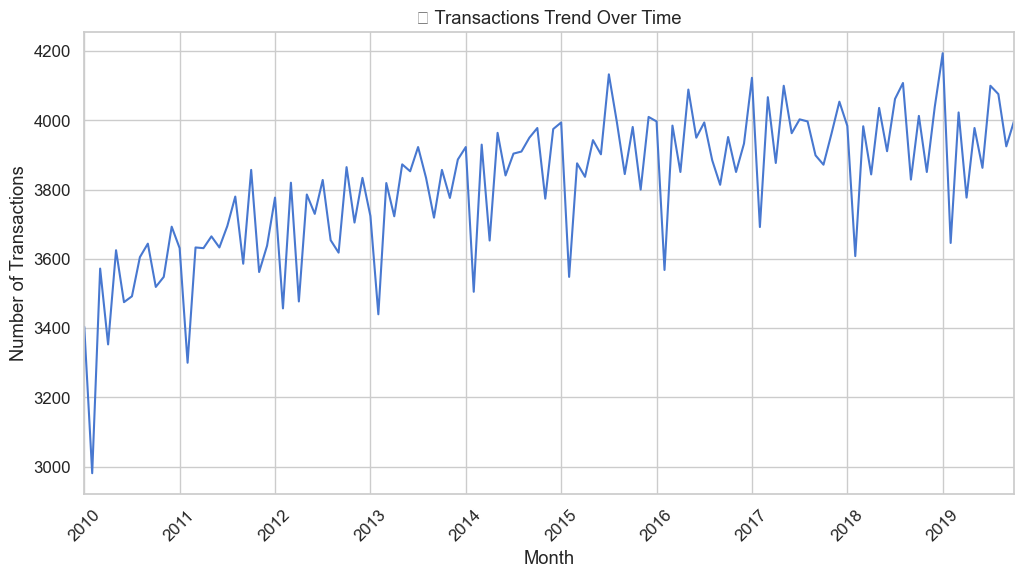

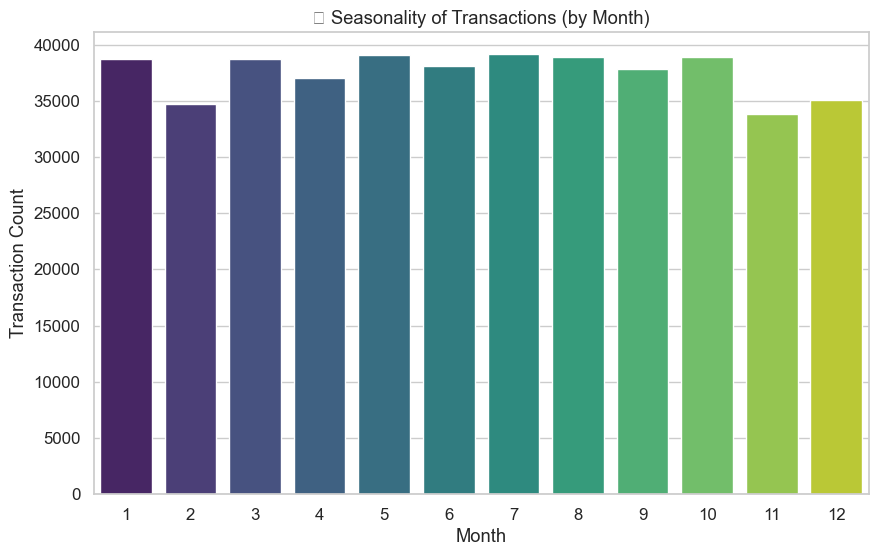

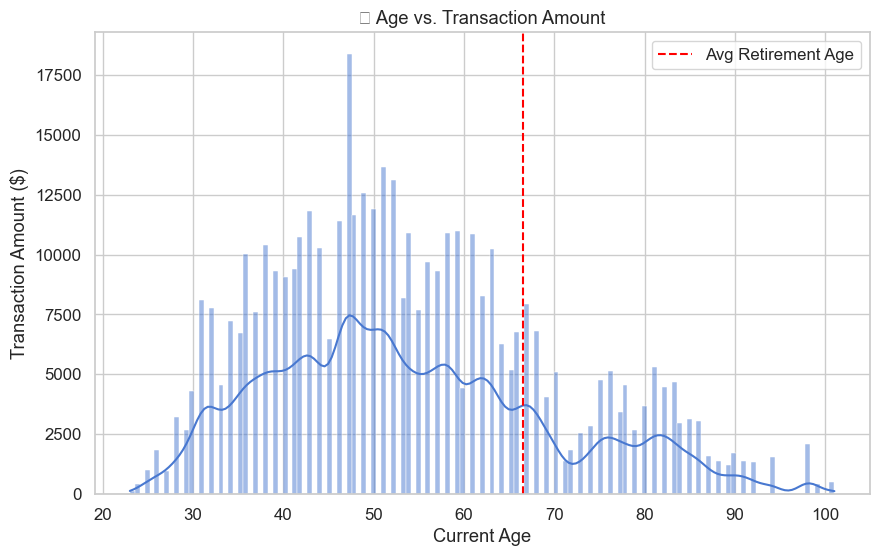

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a clean seaborn style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# -------------------------------
# TIME-BASED INSIGHTS
# -------------------------------

# Trend of transactions over time
dates = pd.to_datetime(sample_df['date'], errors='coerce')
sample_df['year'] = dates.dt.year
sample_df['month'] = dates.dt.to_period('M')


# Transactions per month
plt.figure(figsize=(12,6))
sample_df.groupby('month').size().plot()
# sns.lineplot(data=sample_df, x="month", y="amount")
plt.title("📈 Transactions Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

# Seasonality by month
plt.figure(figsize=(10,6))
sns.countplot(x=dates.dt.month, palette="viridis")
plt.title("💳 Seasonality of Transactions (by Month)")
plt.xlabel("Month")
plt.ylabel("Transaction Count")
plt.show()

# Customer behavior before retirement age
plt.figure(figsize=(10,6))
# sns.scatterplot(data=sample_df, x="current_age", y="amount", alpha=0.4)
sns.histplot(data=sample_df, x="current_age", kde=True)
plt.axvline(sample_df['retirement_age'].mean(), color="red", linestyle="--", label="Avg Retirement Age")
plt.title("⏳ Age vs. Transaction Amount")
plt.xlabel("Current Age")
plt.ylabel("Transaction Amount ($)")
plt.legend()
plt.show()


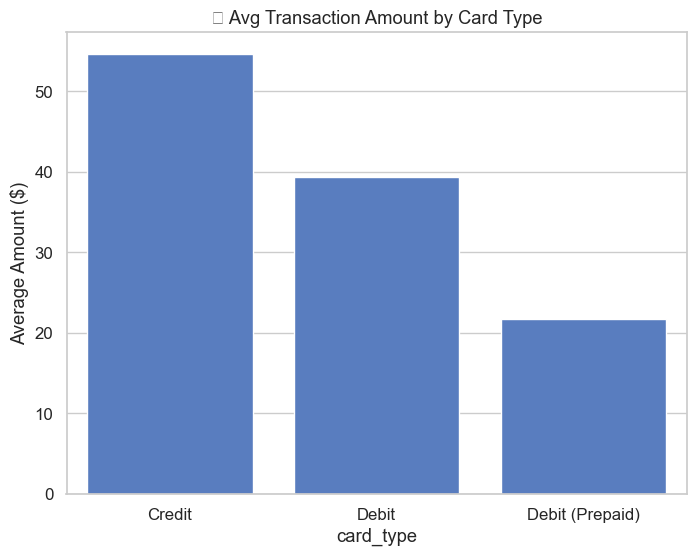

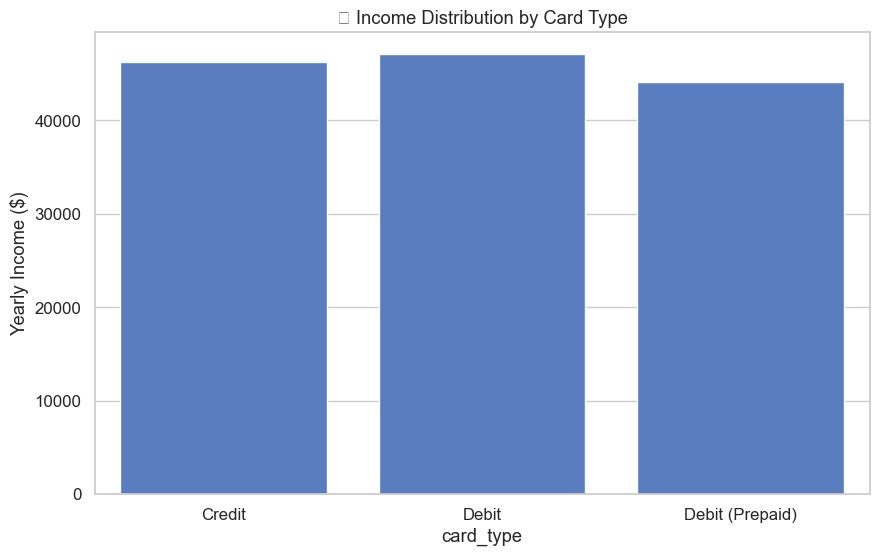

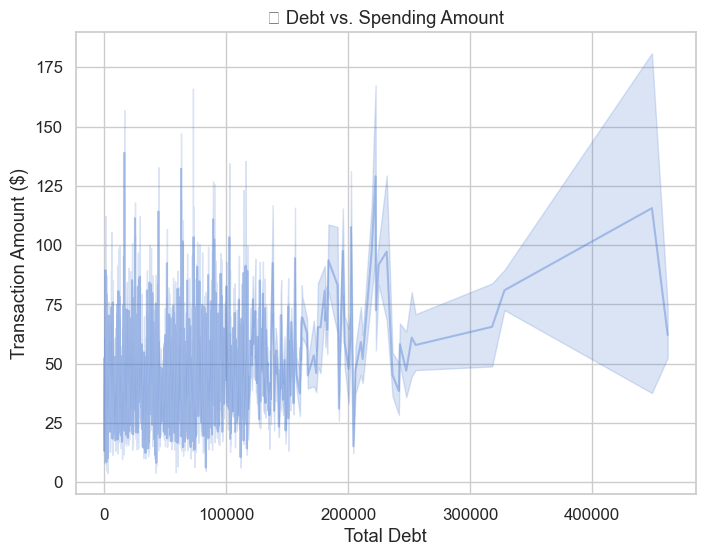

In [ ]:
# -------------------------------
# SPENDING BEHAVIOR
# -------------------------------

# Avg transaction amount by card_type
plt.figure(figsize=(8,6))
sns.barplot(data=sample_df, x="card_type", y="amount", estimator="mean", ci=None)
plt.title("💰 Avg Transaction Amount by Card Type")
plt.ylabel("Average Amount ($)")
plt.show()

# High vs. low spenders by yearly_income
plt.figure(figsize=(10,6))
sns.barplot(data=sample_df, x="card_type", y="yearly_income", estimator="mean", ci=None)
plt.title("🏦 Income Distribution by Card Type")
plt.ylabel("Yearly Income ($)")
plt.show()



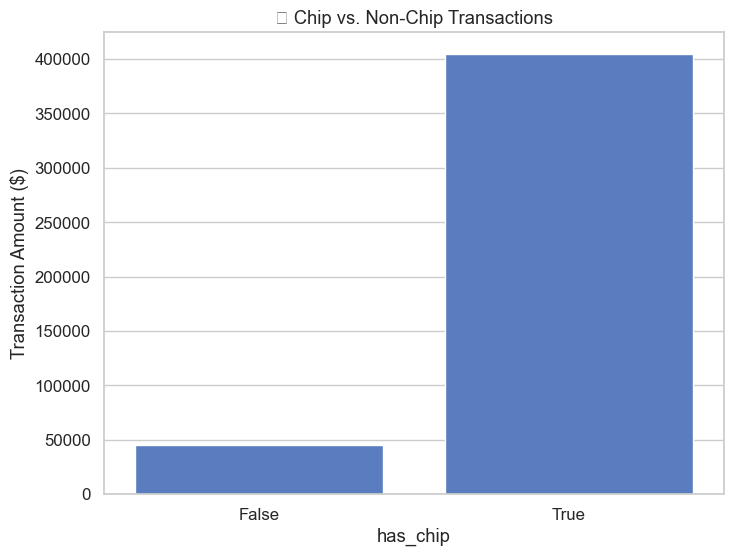

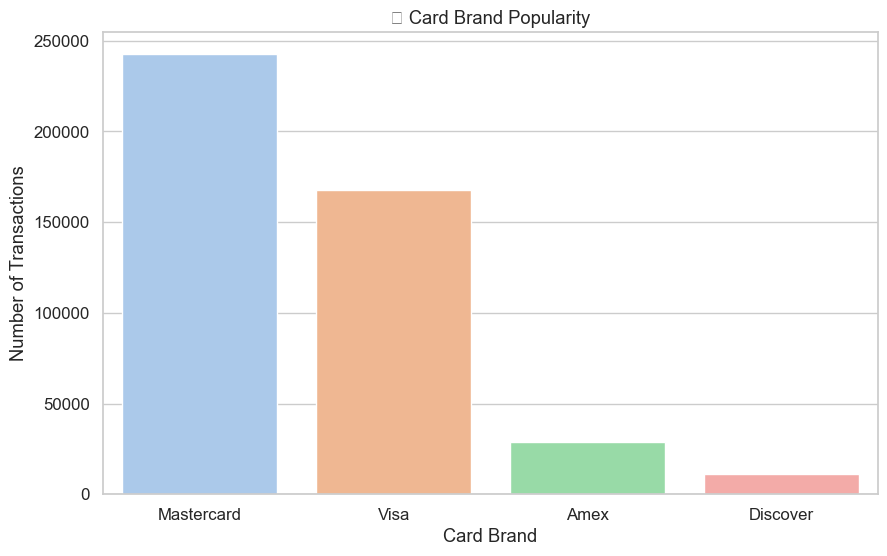

In [ ]:
# -------------------------------
# CARD USAGE
# -------------------------------

# Chip vs Non-chip transaction amounts
plt.figure(figsize=(8,6))
sns.countplot(data=sample_df, x="has_chip")
plt.title("🔒 Chip vs. Non-Chip Transactions")
plt.ylabel("Transaction Amount ($)")
plt.show()

# Card brand popularity
plt.figure(figsize=(10,6))
sns.countplot(data=sample_df, x="card_brand", order=sample_df['card_brand'].value_counts().index, palette="pastel")
plt.title("💳 Card Brand Popularity")
plt.xlabel("Card Brand")
plt.ylabel("Number of Transactions")
plt.show()



Exporting Excel File

In [ ]:
sample_df.to_excel("sample_transactions.xlsx", index=False)
print("Sample transactions saved to 'sample_transactions.xlsx'")


Sample transactions saved to 'sample_transactions.xlsx'
